In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
budget = 1000
sample_size = 20
env = "RaceStrategy"
particles = [2,4,6,8,10,12,14,16,18,20]

df = pd.read_csv("{}/pf_{}/data_eval_pf_{}_{}.csv".format(env,budget,env,budget))
df['type'] = ["pf"]*df.shape[0]

temp = pd.DataFrame(columns=df.columns)

for p in particles:
    res = df.loc[df['agent'] == str(p)+'_pf', ][:sample_size]
    temp = pd.concat([temp, res])

df = temp
df

,agent,total_reward,discounted_reward,length,budget,pit_count,type
0,2_pf,6.986266,6.986266,20,1000,6,pf
1,2_pf,7.217010,7.217010,20,1000,3,pf
2,2_pf,7.280608,7.280608,20,1000,2,pf
3,2_pf,7.202954,7.202954,20,1000,3,pf
4,2_pf,7.204565,7.204565,20,1000,3,pf
5,2_pf,7.283993,7.283993,20,1000,3,pf
6,2_pf,7.152202,7.152202,20,1000,5,pf
7,2_pf,7.403586,7.403586,20,1000,2,pf
8,2_pf,7.140922,7.140922,20,1000,3,pf
9,2_pf,7.299080,7.299080,20,1000,2,pf


In [3]:
df_dpw = pd.read_csv("{}/dpw_{}/dpw_mcts_only_{}_{}_data_exp_0.csv".format(env,budget,env,budget))
df_dpw['type'] = ["dpw"]*df_dpw.shape[0]
df_dpw['agent'] = ["dpw"]*df_dpw.shape[0]
df_dpw = df_dpw[:sample_size]
df_dpw

,agent,total_reward,discounted_reward,length,budget,pit_count,type
0,dpw,7.120515,6.480391,20,1000,3,dpw
1,dpw,7.264215,6.604927,20,1000,3,dpw
2,dpw,7.227879,6.576805,20,1000,3,dpw
3,dpw,7.351938,6.691154,20,1000,2,dpw
4,dpw,7.174157,6.533613,20,1000,2,dpw
5,dpw,7.282864,6.631554,20,1000,2,dpw
6,dpw,7.335457,6.673111,20,1000,2,dpw
7,dpw,7.211011,6.570137,20,1000,2,dpw
8,dpw,7.214354,6.567024,20,1000,3,dpw
9,dpw,7.279984,6.630269,20,1000,2,dpw


In [4]:
df2 = pd.read_csv("{}/paper_{}/data.csv".format(env,budget))
df2 = df2[~df2.agent.isin(['agent'])].apply(pd.to_numeric, errors='ignore')
df2 = df2.sort_values(by="agent")
df2['type'] = ["paper"]*df2.shape[0]
df2

,agent,budget,seed,total_reward,return,length,pit_count,type
79,deterministic,1000,987877374,7.421474,6.756471,20,3,paper
29,deterministic,1000,987877358,7.320370,6.664674,20,3,paper
48,deterministic,1000,987877363,7.345123,6.686139,20,3,paper
62,deterministic,1000,987877365,7.405463,6.742328,20,3,paper
63,deterministic,1000,987877366,7.359243,6.703095,20,3,paper
30,deterministic,1000,987877357,7.418789,6.756441,20,3,paper
55,deterministic,1000,987877364,7.312527,6.654116,20,4,paper
32,deterministic,1000,987877359,7.403086,6.737819,20,3,paper
33,deterministic,1000,987877360,7.396859,6.731340,20,3,paper
64,deterministic,1000,987877367,7.401420,6.740714,20,4,paper


In [5]:
temp = pd.DataFrame(columns=df2.columns)

for agent in df2["agent"].unique():
    res = df2.loc[df2['agent'] == agent, ][:sample_size]
    temp = pd.concat([temp, res])
    
df2 = temp

df3 = pd.concat([df, df2, df_dpw], ignore_index=True)
df3 = df3.sort_values(by="agent")

df3

C:\Users\Diego\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


,agent,budget,discounted_reward,length,pit_count,return,seed,total_reward,type
89,10_pf,1000,7.089687,20,4,NaN,NaN,7.089687,pf
97,10_pf,1000,7.184824,20,2,NaN,NaN,7.184824,pf
96,10_pf,1000,6.861062,20,6,NaN,NaN,6.861062,pf
95,10_pf,1000,7.064920,20,6,NaN,NaN,7.064920,pf
94,10_pf,1000,7.170679,20,3,NaN,NaN,7.170679,pf
93,10_pf,1000,6.895192,20,6,NaN,NaN,6.895192,pf
92,10_pf,1000,7.017966,20,5,NaN,NaN,7.017966,pf
91,10_pf,1000,7.325684,20,2,NaN,NaN,7.325684,pf
90,10_pf,1000,7.014270,20,4,NaN,NaN,7.014270,pf
88,10_pf,1000,7.169499,20,3,NaN,NaN,7.169499,pf


Saving total_reward plot to RaceStrategy/racestrategy_total_reward_1000.png


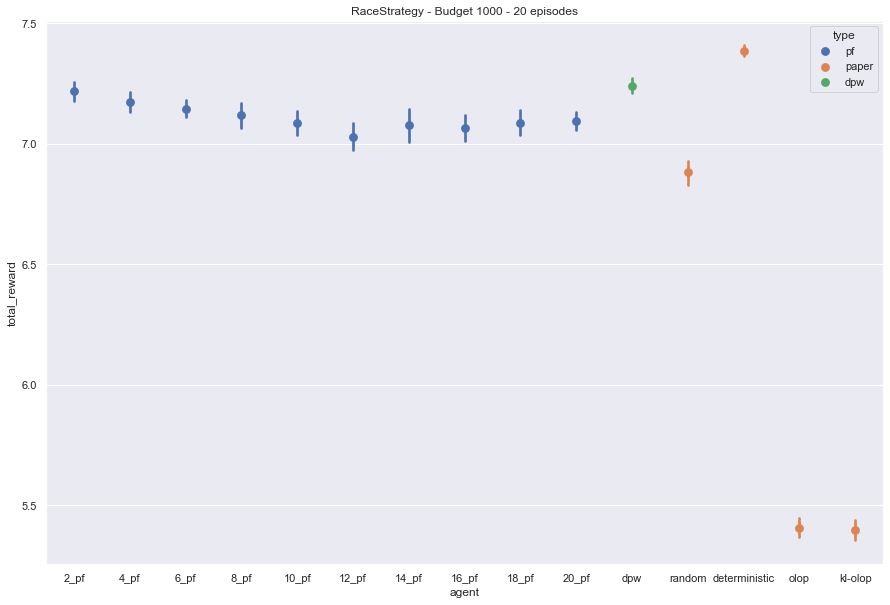

In [7]:
sns.set(style="darkgrid")
plt.figure(figsize=(15, 10))
plot = sns.pointplot(x="agent", y="total_reward", data=df3, hue="type", legend=False, join=False,
                    order=["2_pf", "4_pf", "6_pf", "8_pf", "10_pf", "12_pf", "14_pf","16_pf","18_pf","20_pf", "dpw", "random", "deterministic", "olop", "kl-olop"])

plot.set_title("{} - Budget {} - {} episodes".format(env, budget, sample_size))


field_path = "{}/{}_total_reward_{}.png".format(env, env.lower(), budget)
plot.get_figure().savefig(field_path, bbox_inches='tight')
print("Saving total_reward plot to {}".format(field_path))

Saving pit_count plot to RaceStrategy/racestrategy_pit_count_1000.png


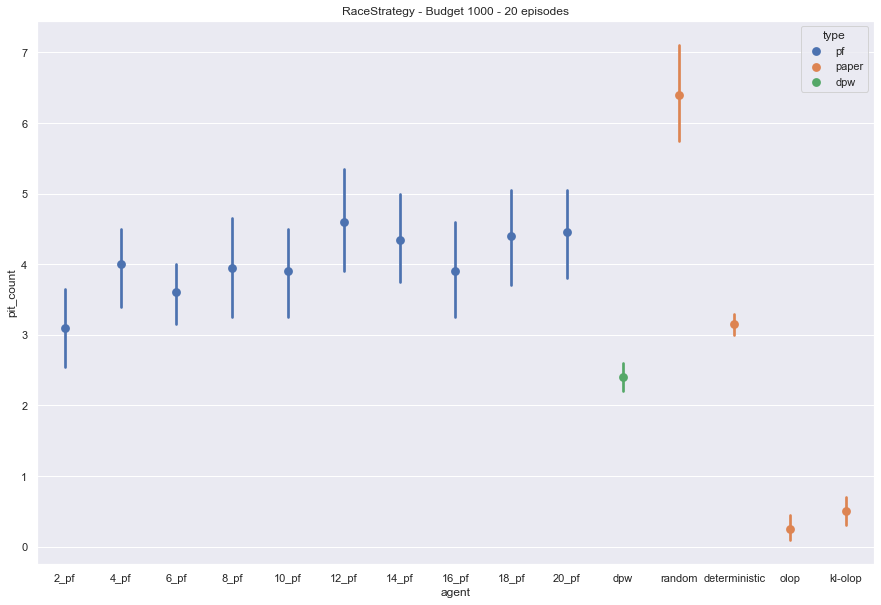

In [8]:
if env == "RaceStrategy":
    plt.figure(figsize=(15, 10))


    plot = sns.pointplot(x="agent", y="pit_count", data=df3, hue="type", legend=False, join=False,
                            order=["2_pf", "4_pf", "6_pf", "8_pf", "10_pf", "12_pf", "14_pf","16_pf","18_pf","20_pf", "dpw", "random", "deterministic", "olop", "kl-olop"])
    #plot2 = sns.pointplot(x="agent", y="total_reward", hue="type", data=df, legend=False)

    plot.set_title("{} - Budget {} - {} episodes".format(env, budget, sample_size))


    field_path = "{}/{}_pit_count_{}.png".format(env, env.lower(), budget)
    plot.get_figure().savefig(field_path, bbox_inches='tight')
    # plt.show()
    print("Saving pit_count plot to {}".format(field_path))